In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adam, Adamax, Nadam

# imposto i seed per replicabilità dei dati
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

#lista di optimizers
optimizers = [SGD(), Adam(), Adagrad(), RMSprop(), Adamax(), Nadam()]
optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]

#dimensioni dell'immagine di input
img_rows, img_cols = 28, 28 # numero di pixel
# output
num_classes = 10 # 10 digits

#dati di validazione e allenamento
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# cambio la forma dei dati per adattarla alla rete DNN. "Stendo" l'immagine riga per riga
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# normalizzo i valori tra [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#ogni input diventa quindi una sequenza piatta di 784 valori di pixel normalizzati

#trasforma i numeri interi delle etichette in vettori binari (one-hot)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [ ]:
def create_DNN():
    # inizializzo il modello
    model = Sequential()
    # primo hidden layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # secondo hidden layer
    model.add(Dense(100, activation='relu'))
    # applico dropout del 50%
    model.add(Dropout(0.5))
    # output layer con softmax. Softmax trasforma i valori grezzi in probabilità
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
#compilazione del modello
def compile_model(opt_suffix):
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,#la loss è la crossentropy, adatta a problemi di classificazione
                  optimizer=opt_suffix,
                  metrics=['acc'])
    return model

0
1
2
3
4
5


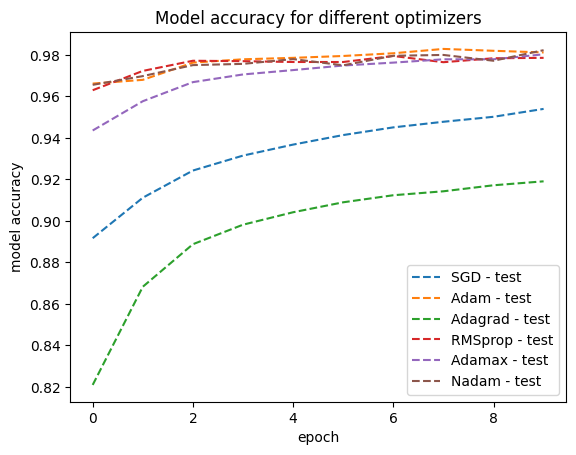

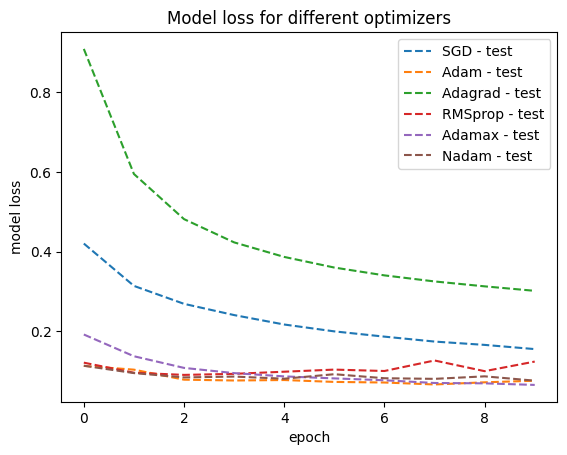

In [ ]:
# parametri di addestramento
batch_size = 64
epochs = 10

# Per salvare gli history
histories = {}

for i in range(6):
    print(i)
    # creo la rete neurale con optimizer differenti
    model_DNN = compile_model(optimizers[i])


    # addestramento dei DNN
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))

    #salvo gli history
    histories[optimizer_names[i]] = history


# plotto l'accuracy di ogni optimizer sui validation data
plt.figure()
for name in optimizer_names:
    plt.plot(histories[name].history['val_acc'], linestyle='--', label=f'{name} - test')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model accuracy for different optimizers")
plt.show()

plt.clf()

# plotto la loss di ogni optimizer sui training data
for name in optimizer_names:
    plt.plot(histories[name].history['val_loss'], linestyle='--', label=f'{name} - test')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model loss for different optimizers")
plt.show()

# Esercizio 12.1
La rete neurale utilizzata è di tipo $DNN$.

Tutti e $6$ gli optimizers all'aumentare delle epoche diminuiscono la loss e migliorano l'accuracy, ma con performance diverse.

Il peggiore risulta essere $Adadelta$, non plottato nei grafici a causa della lenta diminuzione della loss e del lento aumento dell'accuracy che causano una lettura peggiore delle performance degli altri optimizers.

$Adagrad$ e $SGD$ seguono con performance migliori di $Adadelta$, ma inferiori agli altri $4$ optimizers che hanno un andamento pressocchè simile. Questi sono $Adam$, $Nadam$, $Adamax$ e $RMSprop$. Questo suggerisce una migliore capacità di adattamento ai dati e una maggiore robustezza nell’aggiornamento dei pesi, grazie ai meccanismi di adattamento del learning rate e di momentum che integrano.

In generale, si evidenzia come gli optimizer adattativi ($Nadam$, $Adam$, $RMSprop$, $Adamax$) siano più efficaci e veloci nel far apprendere la rete rispetto agli optimizer più semplici come $SGD$ e $Adagrad$, specialmente in problemi complessi come il riconoscimento di immagini con $DNN$. Più l'optimizer è "intelligente", meglio impara la rete.

Infine, l’analisi delle curve di loss e accuracy indica che non si è osservato un evidente overfitting nei modelli con optimizer adattativi, grazie anche a un’adeguata scelta del numero di epoche e all’uso della validazione.
